In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
MAX_EVALUE = 1e-2

# Data Overview

This notebook provides an overview of source datasets - training, testing and 3k bacteria.

# Training data

## ClusterFinder BGCs (positives)

** Used for: Model training **

CSV file with protein domains in genomic order. Contigs (samples) are defined by the `contig_id` column. 

In [3]:
domains = pd.read_csv('../data/training/positive/CF_bgcs.csv')
domains = domains[domains['evalue'] <= MAX_EVALUE]
domains.head()

,contig_id,locus_tag,protein_id,gene_start,gene_end,gene_strand,pfam_id,domain_start,domain_end,evalue,bitscore,in_cluster
0,X62518.1,unknown_locus_tag,CAA44378.1,200,1304,1,PF04486,1,118,2.700000e-46,156.4,1
1,X62518.1,unknown_locus_tag,CAA44378.1,200,1304,1,PF04673,7,92,2.800000e-04,21.0,1
2,X62518.1,unknown_locus_tag,CAA44378.1,200,1304,1,PF03992,9,76,7.100000e-04,19.5,1
3,X62518.1,unknown_locus_tag,CAA44379.1,1348,1813,1,PF07883,1,68,7.800000e-21,73.5,1
5,X62518.1,unknown_locus_tag,CAA44379.1,1348,1813,1,PF02311,9,68,4.000000e-07,29.9,1


In [4]:
num_contigs = len(domains['contig_id'].unique())
num_contigs

617

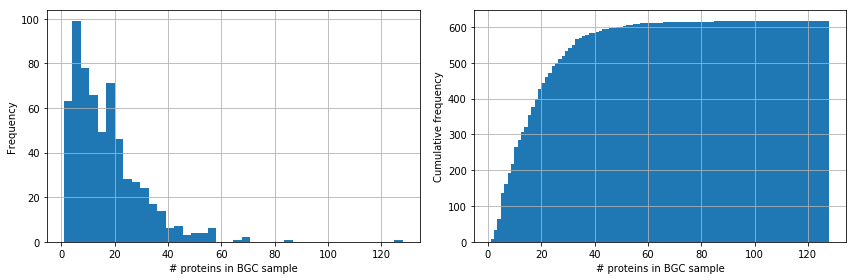

In [5]:
contig_proteins = domains.groupby("contig_id")['protein_id'].nunique()
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = contig_proteins.hist(bins=40, ax=axes[0])
ax.set_xlabel('# proteins in BGC sample')
ax.set_ylabel('Frequency')
ax = contig_proteins.hist(bins=100, ax=axes[1], cumulative=True)
ax.set_xlabel('# proteins in BGC sample')
ax.set_ylabel('Cumulative frequency')
plt.tight_layout()

Text(0,0.5,'Frequency')

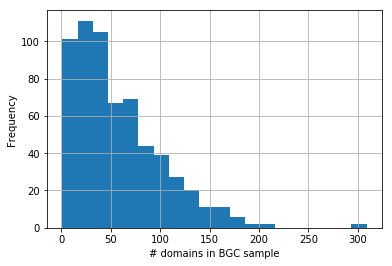

In [6]:
contig_domains = domains.groupby("contig_id")['pfam_id'].size()
ax = contig_domains.hist(bins=20)
ax.set_xlabel('# domains in BGC sample')
ax.set_ylabel('Frequency')

## MIBiG BGCs (positives)

** Used for: LCO validation, 10-fold Cross-validation **

CSV file with protein domains in genomic order. Contigs (samples) are defined by the `contig_id` column. 


In [9]:
domains = pd.read_csv('../data/training/positive/mibig_bgcs_all.csv')
domains = domains[domains['evalue'] <= MAX_EVALUE]
domains.head()

,contig_id,locus_tag,protein_id,gene_start,gene_end,gene_strand,pfam_id,domain_start,domain_end,evalue,bitscore,in_cluster
0,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF13649,0,73,5.000000e-08,33.4,1
1,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF08241,0,51,2.300000e-03,18.5,1
2,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF13847,3,63,1.100000e-09,38.2,1
3,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF13489,12,62,5.100000e-04,19.8,1
4,BGC0000001.1,unknown_locus_tag,AEK75490.1,0,1083,1,PF02353,35,109,9.000000e-03,15.2,1


In [10]:
num_contigs = len(domains['contig_id'].unique())
num_contigs

1551

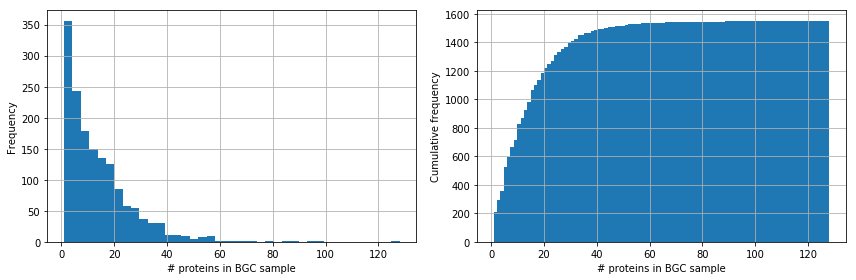

In [11]:
contig_proteins = domains.groupby("contig_id")['protein_id'].nunique()
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = contig_proteins.hist(bins=40, ax=axes[0])
ax.set_xlabel('# proteins in BGC sample')
ax.set_ylabel('Frequency')
ax = contig_proteins.hist(bins=100, ax=axes[1], cumulative=True)
ax.set_xlabel('# proteins in BGC sample')
ax.set_ylabel('Cumulative frequency')
plt.tight_layout()

Text(0,0.5,'Frequency')

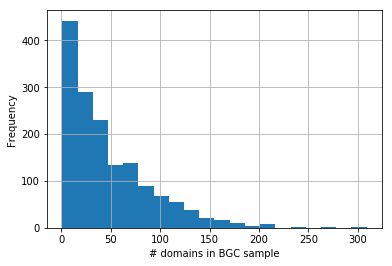

In [12]:
contig_domains = domains.groupby("contig_id")['pfam_id'].size()
ax = contig_domains.hist(bins=20)
ax.set_xlabel('# domains in BGC sample')
ax.set_ylabel('Frequency')

In [16]:
contig_domains.describe(percentiles=np.arange(0, 1, 0.05))

count    1551.000000
mean       47.539652
std        44.314356
min         1.000000
0%          1.000000
5%          2.000000
10%         5.000000
15.0%       8.000000
20%        11.000000
25%        14.000000
30.0%      17.000000
35%        21.000000
40%        25.000000
45%        29.000000
50%        35.000000
55.0%      40.000000
60.0%      45.000000
65%        52.500000
70%        61.000000
75%        69.000000
80%        78.000000
85.0%      91.500000
90%       109.000000
95%       134.000000
max       309.000000
Name: pfam_id, dtype: float64

In [12]:
properties = pd.read_csv('../data/mibig/mibig_properties.csv')
properties.head()

,BGC_ID,contig_id,num_proteins,classes,source,species
0,BGC0000001,BGC0000001.1,28,Polyketide,Verrucosispora maris AB-18-032,Verrucosispora
1,BGC0000002,BGC0000002.1,34,Polyketide,Kutzneria albida DSM 43870,Kutzneria
2,BGC0000003,BGC0000003.1,6,Polyketide,Alternaria alternata,Alternaria
3,BGC0000004,BGC0000004.1,23,Polyketide,Aspergillus oryzae,Aspergillus
4,BGC0000005,BGC0000005.1,1,Polyketide,Aspergillus parasiticus,Aspergillus


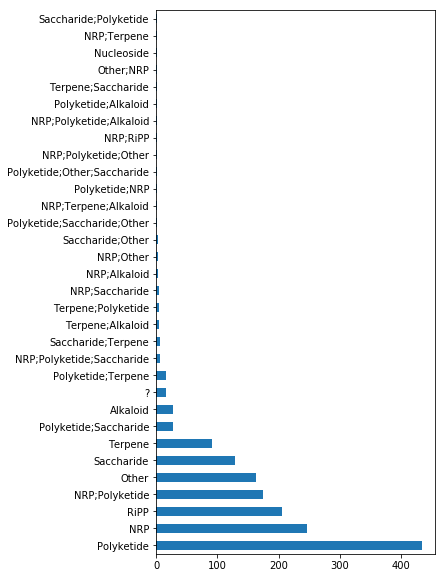

In [13]:
properties['classes'].value_counts().plot.barh(figsize=(5, 10))

Polyketide    670
NRP           444
RiPP          207
Saccharide    180
Other         174
Terpene       125
Alkaloid       39
?              16
Nucleoside      1
dtype: int64


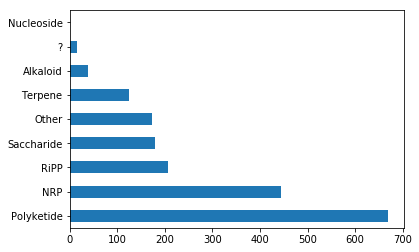

In [14]:
classes_split = properties['classes'].apply(lambda c: c.split(';'))
class_counts = pd.Series([c for classes in classes_split for c in classes]).value_counts()
class_counts.plot.barh()
print(class_counts)

# GeneSwap negatives

** Used for: Model training, LCO validation **

In [15]:
domains = pd.read_csv('../data/training/negative/geneswap_negatives.csv')
domains = domains[domains['evalue'] <= MAX_EVALUE]
domains.head()

,contig_id,protein_id,gene_start,gene_end,gene_strand,pfam_id,domain_start,domain_end,evalue,bitscore,in_cluster
0,NEG_FAKE_CLUSTER|AE000511.1|AF269227.1,AE000511_1072,0,2237,1,PF00702,0.0,210.0,3.300000e-40,138.5,0
1,NEG_FAKE_CLUSTER|AE000511.1|AF269227.1,AE000511_1072,0,2237,1,PF00403,1.0,61.0,5.800000e-12,45.8,0
2,NEG_FAKE_CLUSTER|AE000511.1|AF269227.1,AE000511_1072,0,2237,1,PF00122,2.0,178.0,7.000000e-48,162.4,0
3,NEG_FAKE_CLUSTER|AE000511.1|AF269227.1,AE000511_1072,0,2237,1,PF08282,196.0,255.0,2.900000e-04,20.6,0
4,NEG_FAKE_CLUSTER|AE000511.1|AF269227.1,AE000511_1503,2237,4870,1,PF00593,1.0,469.0,2.200000e-26,93.7,0


In [16]:
num_contigs = len(domains['contig_id'].unique())
num_contigs

10128

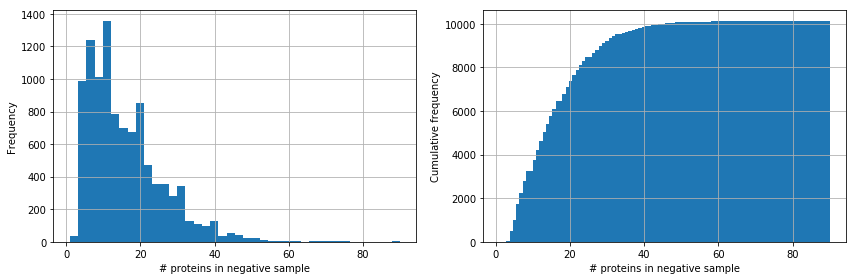

In [17]:
contig_proteins = domains.groupby("contig_id")['protein_id'].nunique()
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = contig_proteins.hist(bins=40, ax=axes[0])
ax.set_xlabel('# proteins in negative sample')
ax.set_ylabel('Frequency')
ax = contig_proteins.hist(bins=100, ax=axes[1], cumulative=True)
ax.set_xlabel('# proteins in negative sample')
ax.set_ylabel('Cumulative frequency')
plt.tight_layout()

Text(0,0.5,'Frequency')

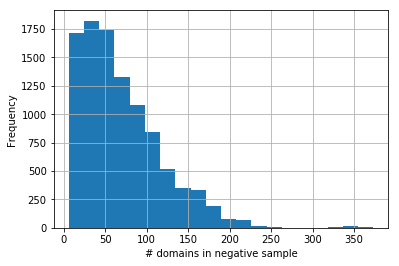

In [18]:
contig_domains = domains.groupby("contig_id")['pfam_id'].size()
ax = contig_domains.hist(bins=20)
ax.set_xlabel('# domains in negative sample')
ax.set_ylabel('Frequency')

# Validation and testing data

## ClusterFinder labelled contigs

** Used for: Model validation - ROC curves **

10 labelled genomes (13 contigs) with non-BGC and BGC regions (stored in `in_cluster` column for each domain)

In [21]:
contigs = pd.read_csv('../data/clusterfinder/labelled/CF_labelled_contig_summary.csv', sep=';')
contigs

,NCBI ID,Genome ID,contig id,First matched gene locus,Comment
0,KK037166.1,Kutzneria_sp_744,7000000120755710,KUTG_00017,NaN
1,GG657738.1,Micro_carb_varATCC39149,7000000100042090,MCAG_00263,NaN
2,?,Micromonospora_M42_V1,7000000120751190,MCBG_06048,Single gene found in KK037235.1
3,KK037233.1,Micromonospora_M42_V1,7000000120751200,MCBG_00001,NaN
4,DS999641.1,S.ghanaensis_ATCC14672_V1,7000000097658250,SSFG_00077,NaN
5,DS999642.1,S.ghanaensis_ATCC14672_V1,7000000097658250,SSFG_07668,NaN
6,DS999645.1,StrAlb_J1074_V3,7000000097658260,SSHG_00007,NaN
7,?,StrRos_NRRL11379_V1,7000000097766170,SSIG_00095,NaN
8,?,StrRos_NRRL11379_V1,7000000097766170,SSIG_06930,"Found in ABYX02000001.1, but only covers 2% of..."
9,GG657754.1,Strept_hygr_ATCC53653,7000000100418300,SSOG_00081,NaN


In [24]:
domains = pd.read_csv('../data/clusterfinder/labelled/CF_labelled_contigs_domains.csv')
domains = domains[domains['evalue'] <= MAX_EVALUE]
domains.head()

,contig_id,locus_tag,protein_id,gene_start,gene_end,gene_strand,pfam_id,domain_start,domain_end,evalue,bitscore,in_cluster
0,CM000950.1,SSDG_00780,EDY62461.1,13,1003,1,PF13515,3,127,1.200000e-12,48.0,0.0
3,CM000950.1,SSDG_00782,EDY62463.1,1211,2039,1,PF08241,0,95,1.900000e-14,53.9,0.0
4,CM000950.1,SSDG_00782,EDY62463.1,1211,2039,1,PF08242,0,99,5.100000e-12,46.3,0.0
5,CM000950.1,SSDG_00782,EDY62463.1,1211,2039,1,PF13649,1,97,4.500000e-12,46.4,0.0
6,CM000950.1,SSDG_00782,EDY62463.1,1211,2039,1,PF13847,5,128,8.300000e-11,41.8,0.0


In [46]:
def count_y_clusters(y):
    prev = 0
    clusters = 0
    for val in y:
        if val == 1 and prev == 0:
            clusters += 1
        prev = val
    return clusters

### non-BGC and BGC regions

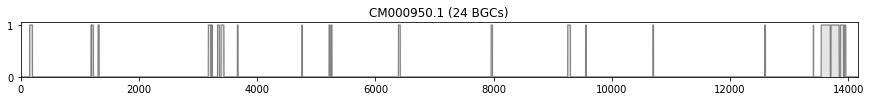

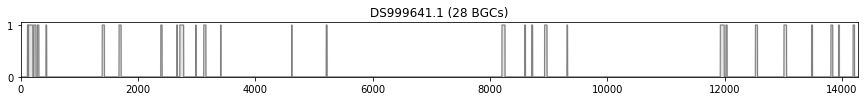

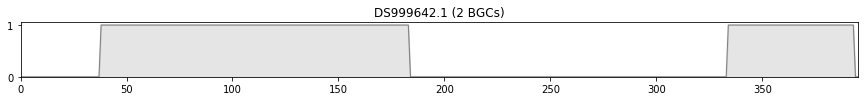

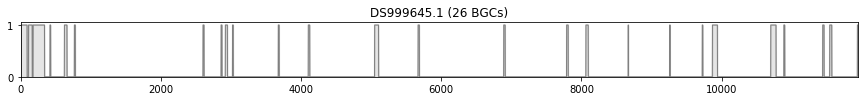

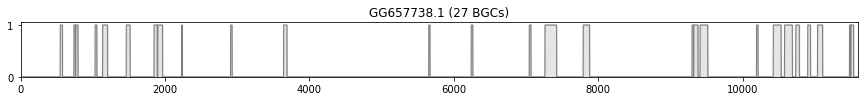

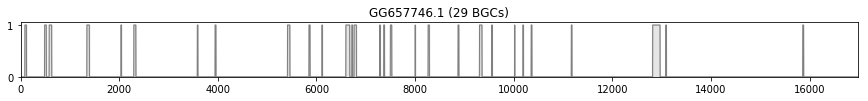

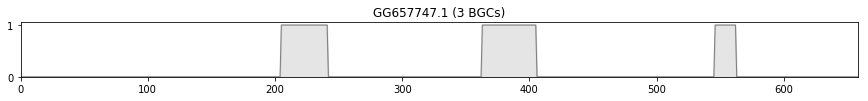

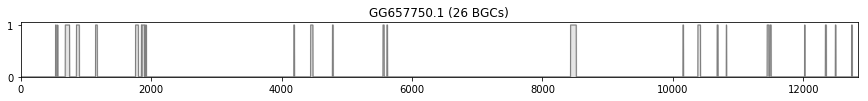

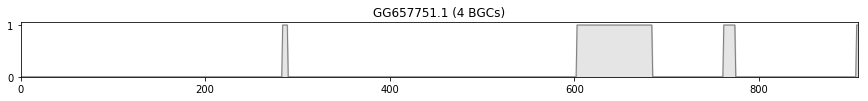

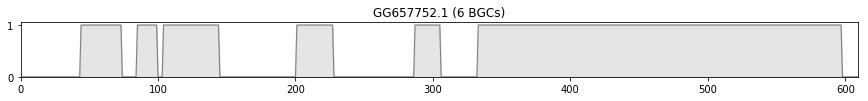

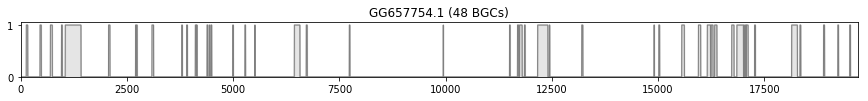

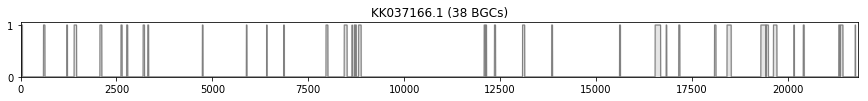

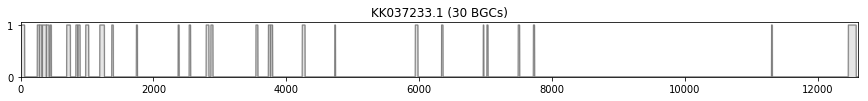

In [47]:
for contig_id, contig_domains in domains.groupby('contig_id'):
    in_cluster = contig_domains.reset_index()['in_cluster']
    num_bgcs = count_y_clusters(in_cluster)
    title = '{} ({} BGCs)'.format(contig_id, num_bgcs)
    ax = in_cluster.plot(figsize=(15, 1), title=title, color='grey', lw=1)
    in_cluster.plot(kind='area', ax=ax, color='grey', alpha=0.2)
    plt.show()

## ClusterFinder 75 BGCs in genomic context

** Used for: Model validation - TPR evaluation **

6 labelled genomes with annotated BGC regions. Remaining regions are not known.

75 BGCs are annotated (10 are duplicates found twice, so only 65 are unique)

In [42]:
bgc75_locations = pd.read_csv('../data/clusterfinder/74validation/74validation_locations.csv')
bgc75_locations.head()

,Accession,Organism,BGC_start,BGC_stop,Locus_start,Locus_end
0,AM746676.1,Sorangium cellulosum So ce 56,5761328,5853706,sce4132,sce4138
1,AM746676.1,Sorangium cellulosum So ce 56,4373490,4462891,sce3185,sce3196
2,AM746676.1,Sorangium cellulosum So ce 56,11484644,11529102,sce8254,sce8262
3,AM746676.1,Sorangium cellulosum So ce 56,5398169,5418126,sce3879,sce3891
4,AM746676.1,Sorangium cellulosum So ce 56,1150403,1167578,sce0818,sce0820


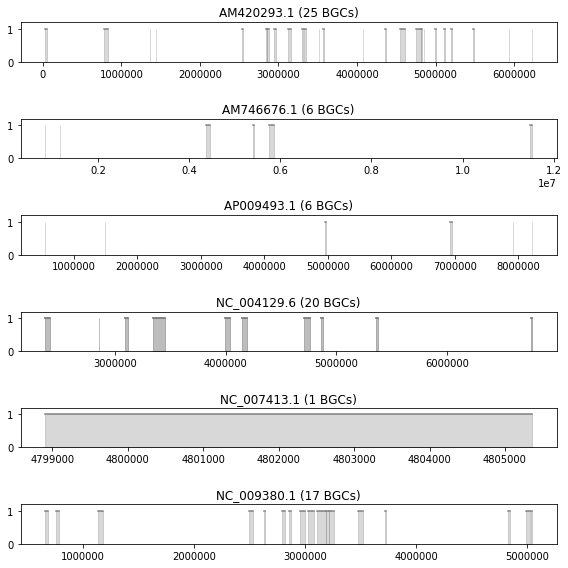

In [57]:
fig, axes = plt.subplots(len(bgc75_locations['Accession'].unique()), figsize=(8, 8))
i = 0
for contig_id, contig_bgcs in bgc75_locations.groupby('Accession'):
    num_bgcs = len(contig_bgcs)
    title = '{} ({} BGCs)'.format(contig_id, num_bgcs)
    axes[i].set_title(title)
    axes[i].set_ylim([0, 1.2])
    for b, bgc in contig_bgcs.iterrows():
        axes[i].plot([bgc['BGC_start'], bgc['BGC_stop']], [1, 1], color='grey')
        axes[i].fill_between([bgc['BGC_start'], bgc['BGC_stop']], [1, 1], color='grey', alpha=0.3)
    i += 1
    plt.tight_layout()

In [44]:
bgc75_domains = pd.read_csv('../data/clusterfinder/74validation/74validation_domains.csv')
bgc75_domains = bgc75_domains[bgc75_domains['evalue'] <= MAX_EVALUE]
bgc75_domains.head()

,contig_id,locus_tag,protein_id,gene_start,gene_end,gene_strand,pfam_id,domain_start,domain_end,evalue,bitscore
0,NC_007413.1,Ava_0001,YP_320522.1,118,1501,1,PF00308,0,217,9.500000e-91,303.4
1,NC_007413.1,Ava_0001,YP_320522.1,118,1501,1,PF08299,0,69,2.200000e-29,101.2
2,NC_007413.1,Ava_0001,YP_320522.1,118,1501,1,PF11638,1,63,1.100000e-16,60.3
3,NC_007413.1,Ava_0001,YP_320522.1,118,1501,1,PF00004,1,127,5.200000e-04,20.4
6,NC_007413.1,Ava_0001,YP_320522.1,118,1501,1,PF01695,48,152,1.300000e-11,44.5


# 3k reference genomes

3376 bacterial genomes, preprocessed using Prodigal & Pfam Hmmscan.

## Reference genomes species

In [10]:
bac_species = pd.read_csv('../data/bacteria/species.tsv', sep='\t').set_index('contig_id')
bac_species['family'] = bac_species['species'].apply(lambda species: species.split('_')[0])
bac_species['subspecies'] = bac_species['species'].apply(lambda species: ' '.join(species.split('_')[:2]))
bac_species.head()

,species,family,subspecies
contig_id,,,
AE000511.1,Helicobacter_pylori_26695,Helicobacter,Helicobacter pylori
AE000512.1,Thermotoga_maritima_MSB8,Thermotoga,Thermotoga maritima
AE000516.2,Mycobacterium_tuberculosis_CDC1551,Mycobacterium,Mycobacterium tuberculosis
AE000520.1,Treponema_pallidum_subsp._pallidum_str._Nichol...,Treponema,Treponema pallidum
AE000657.1,Aquifex_aeolicus_VF5,Aquifex,Aquifex aeolicus


In [11]:
bac_families_top = bac_species['family'].value_counts()[:20]
print('Unique families:', len(bac_species['family'].unique()))
bac_families_top

Unique families: 654


Salmonella         175
Bacillus           168
Streptococcus      135
Escherichia         98
Mycobacterium       97
Candidatus          90
Pseudomonas         87
Staphylococcus      85
Helicobacter        84
Corynebacterium     79
Chlamydia           75
Mycoplasma          75
Lactobacillus       67
Bifidobacterium     55
Clostridium         55
Campylobacter       54
Yersinia            51
Listeria            46
Rickettsia          44
Xanthomonas         38
Name: family, dtype: int64

In [12]:
bac_species_top = bac_species['subspecies'].value_counts()[:20]
print('Unique species:', len(bac_species['subspecies'].unique()))
bac_species_top

Unique species: 1442


Salmonella enterica           172
Escherichia coli               96
Helicobacter pylori            76
Staphylococcus aureus          68
Chlamydia trachomatis          45
Listeria monocytogenes         38
Mycobacterium tuberculosis     36
Bacillus anthracis             31
Klebsiella pneumoniae          28
Yersinia pestis                27
Bacillus subtilis              27
Campylobacter jejuni           26
Streptococcus pyogenes         26
Bacillus cereus                25
Acinetobacter baumannii        25
Francisella tularensis         25
Pseudomonas aeruginosa         22
Bacillus thuringiensis         22
Neisseria meningitidis         21
Xanthomonas citri              20
Name: subspecies, dtype: int64

## Reference genomes domains

** Used for: Pfam2vec corpus generation, Novel BGC candidate prediction **

Domain CSV files, one for each bacteria.

In [90]:
bac_domains = pd.read_csv('../data/bacteria/domains/AE000511.1.domains.csv', nrows=10)
bac_domains.head()

,protein_id,gene_start,gene_end,gene_strand,pfam_id,domain_start,domain_end,evalue,bitscore
0,AE000511_1,217,633,-1,PF01029,1,133,1.500000e-29,102.9
1,AE000511_1,217,633,-1,PF11929,16,33,1.000000e+01,6.1
2,AE000511_2,635,1105,-1,PF00885,2,139,2.700000e-49,166.5
3,AE000511_3,1115,1945,-1,PF00793,16,263,4.000000e-62,209.5
4,AE000511_4,1932,2597,-1,PF00484,0,156,1.300000e-43,148.8


## Reference genomes pfam corpus

** Used for: Pfam2vec training **

Corpus of 23,425,967 pfams domains (words) used to train the pfam2vec embedding using the word2vec algorithm.

Corpus contains pfam domains from one bacteria per line, separated by space.

In [62]:
corpus = pd.read_csv('../data/bacteria/corpus/corpus-1e-02.txt', nrows=10, header=None)
corpus.head()

,0
0,PF01029 PF00885 PF00793 PF00484 PF00215 PF0256...
1,PF13087 PF13245 PF13086 PF13604 PF13401 PF1337...
2,PF00308 PF00004 PF08299 PF01695 PF02768 PF0071...
3,PF00308 PF08299 PF00004 PF00910 PF11638 PF1317...
4,PF03764 PF14492 PF00679 PF03144 PF00009 PF1665...


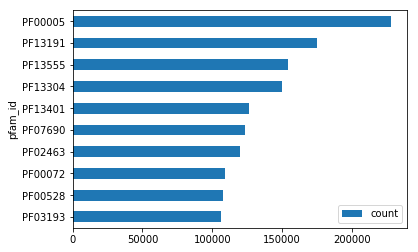

In [70]:
corpus_counts = pd.read_csv('../data/bacteria/corpus/corpus-1e-02.counts.csv').set_index('pfam_id')
corpus_counts[:10][::-1].plot.barh()

The pfam counts have a very long-tail distribution with a median of only 101 occurences.

               count
count   15686.000000
mean     1493.431531
std      6263.235835
min         1.000000
25%        10.000000
50%       101.000000
75%       647.000000
max    228268.000000


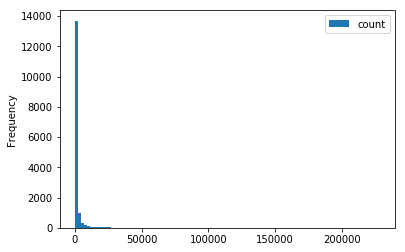

In [86]:
corpus_counts.plot.hist(bins=100)
print(corpus_counts.describe())